# WeatherPy
----

### Analysis
* Currently the southern hemisphere is expirencing their summer season, while the northern hemisphere is enjoying the winter season.
* The northern hemisphere is currently experiencing higher wind speeds.
* There does not appear to be a corrolation between latitute and cloudiness, nor one between latitute and humitity.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


# Import API key
import imp

temp_file = imp.load_source("api_keys", "../starter_code/api_keys.py")

api_key = temp_file.api_key

del temp_file



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Create Dataframe
weather_dic = {
    "City": cities,
}

weather_data = pd.DataFrame(weather_dic)
weather_data["Cloudiness"] = ""
weather_data["Country"] = ""
weather_data["Date"] = ""
weather_data["Humidity"] = ""
weather_data["Lat"] = ""
weather_data["Lng"] = ""
weather_data["Max Temp"] = ""
weather_data["Wind Speed"] = ""


# Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

# Make calls to API
for index, row in weather_data.iterrows():
    
    try:
        print(f"Processing Record {index}: {row['City']}")

        response = requests.get(query_url + row["City"]).json()
        weather_data.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_data.loc[index, 'Country'] = response['sys']['country']
        weather_data.loc[index, 'Date'] = response['dt']
        weather_data.loc[index, 'Humidity'] = response['main']['humidity']
        weather_data.loc[index, 'Lat'] = response['coord']['lat']
        weather_data.loc[index, 'Lng'] = response['coord']['lon']
        weather_data.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_data.loc[index, 'Wind Speed'] = response['wind']['speed']
          
    except:
        print("City not found. Skipping...")

Processing Record 0: elban
Processing Record 1: cutervo
Processing Record 2: turukhansk
Processing Record 3: grand river south east
City not found. Skipping...
Processing Record 4: hithadhoo
Processing Record 5: aswan
Processing Record 6: lensk
Processing Record 7: bathurst
Processing Record 8: avarua
Processing Record 9: jamestown
Processing Record 10: busselton
Processing Record 11: evensk
Processing Record 12: georgetown
Processing Record 13: bredasdorp
Processing Record 14: punta arenas
Processing Record 15: bundaberg
Processing Record 16: sombrerete
Processing Record 17: mundargi
Processing Record 18: port alfred
Processing Record 19: hermanus
Processing Record 20: ushuaia
Processing Record 21: campbell river
Processing Record 22: jalu
Processing Record 23: ilulissat
Processing Record 24: acapulco
Processing Record 25: cape town
Processing Record 26: tazovskiy
Processing Record 27: kiama
Processing Record 28: saldanha
Processing Record 29: hofn
Processing Record 30: grindavik
Proc

Processing Record 233: tuatapere
Processing Record 234: faanui
Processing Record 235: bambous virieux
Processing Record 236: haines junction
Processing Record 237: lincoln
Processing Record 238: itoman
Processing Record 239: gobabis
Processing Record 240: padang
Processing Record 241: provideniya
Processing Record 242: kurchum
Processing Record 243: knysna
Processing Record 244: namibe
Processing Record 245: pevek
Processing Record 246: port lincoln
Processing Record 247: thompson
Processing Record 248: sume
Processing Record 249: srednekolymsk
Processing Record 250: key west
Processing Record 251: salalah
Processing Record 252: lompoc
Processing Record 253: severo-kurilsk
Processing Record 254: palm coast
Processing Record 255: kahului
Processing Record 256: jeremie
Processing Record 257: nanakuli
Processing Record 258: atar
Processing Record 259: port macquarie
Processing Record 260: sao jose da coroa grande
Processing Record 261: mandera
Processing Record 262: san quintin
Processing

Processing Record 467: baykit
Processing Record 468: chagda
City not found. Skipping...
Processing Record 469: wasilla
Processing Record 470: silifke
Processing Record 471: soe
Processing Record 472: arkhangelsk
Processing Record 473: uvalde
Processing Record 474: beni
Processing Record 475: jumla
Processing Record 476: parakai
Processing Record 477: frutal
Processing Record 478: bolshegrivskoye
City not found. Skipping...
Processing Record 479: solnechnyy
Processing Record 480: atikokan
Processing Record 481: epinal
Processing Record 482: tairua
Processing Record 483: soyo
Processing Record 484: peace river
Processing Record 485: satitoa
City not found. Skipping...
Processing Record 486: sarkand
Processing Record 487: guozhen
Processing Record 488: maryville
Processing Record 489: almetyevsk
Processing Record 490: flinders
Processing Record 491: panama city
Processing Record 492: kieta
Processing Record 493: tautira
Processing Record 494: goshogawara
Processing Record 495: lakes entra

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# Created dataframe earlier
weather_data.count()

City          611
Cloudiness    611
Country       611
Date          611
Humidity      611
Lat           611
Lng           611
Max Temp      611
Wind Speed    611
dtype: int64

In [25]:
weather_data.to_csv(output_data_file, index=False, header=True)

In [18]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,elban,48,RU,1551414871,57,50.1,136.51,25.91,5.3
1,cutervo,92,PE,1551414871,98,-6.38,-78.82,51.56,1.72
2,turukhansk,80,RU,1551414871,86,65.8,87.96,11.56,12.46
3,grand river south east,,,,,,,,
4,hithadhoo,8,MV,1551414871,100,-0.6,73.08,82.79,12.35


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [19]:
# Convert datatypes
city_data = weather_data.apply(pd.to_numeric, downcast='signed', errors='ignore')

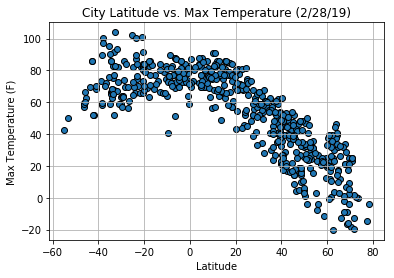

In [20]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o", edgecolors="black", linewidth=1,)


plt.title("City Latitude vs. Max Temperature (2/28/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Latitude_vs_MaxTemperature.png")


plt.show()

#### Latitude vs. Humidity Plot

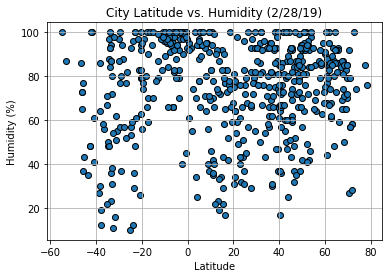

In [21]:
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o", edgecolors="black", linewidth=1,)


plt.title("City Latitude vs. Humidity (2/28/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Latitude_vs_Humidity.png")


plt.show()

#### Latitude vs. Cloudiness Plot

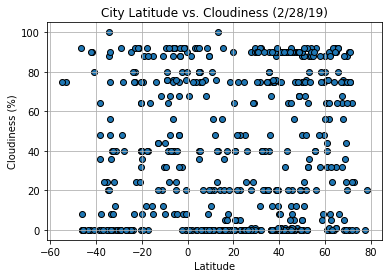

In [22]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o", edgecolors="black", linewidth=1,)


plt.title("City Latitude vs. Cloudiness (2/28/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Latitude_vs_Cloudiness.png")


plt.show()

#### Latitude vs. Wind Speed Plot

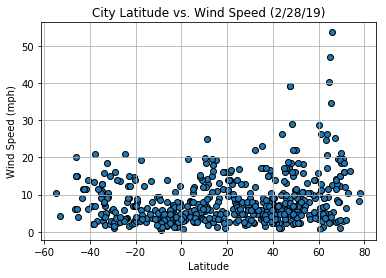

In [23]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o", edgecolors="black", linewidth=1,)


plt.title("City Latitude vs. Wind Speed (2/28/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Latitude_vs_Wind_Speed.png")


plt.show()